

# RNN for Time Series

RNNs are used for sequence modeling. This tutorial will look at a time series data to be modeled and predicted using RNNs.

In [ ]:
#
# Import Libraries
#
import numpy as np
import pandas as pd


## Data

We will use retail data for time-series modeling.

Link to the dataset:
 https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at:
https://www.census.gov/retail/marts/about_the_surveys.html

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted
Frequency:  Monthly

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

### Read data first -  Use index_col = 'DATE' and 'parse_dates = True' as a parameter.

In [ ]:
# Read CSV file into a DataFrame
df = pd.read_csv('MRTSSM448USN.csv', index_col='DATE', parse_dates=True)

# Print the first 5 rows of the DataFrame
print(df.head())

            MRTSSM448USN
DATE                    
1992-01-01        6938.0
1992-02-01        7524.0
1992-03-01        8475.0
1992-04-01        9401.0
1992-05-01        9558.0


Does the sales column has any name?

If no, set the name of the colum as 'Sales'.

In [ ]:
# Set name of column as 'Sales'. Use - df.columns
df = df.rename(columns={'MRTSSM448USN': 'Sales'})

In [ ]:
print(df.head())

             Sales
DATE              
1992-01-01  6938.0
1992-02-01  7524.0
1992-03-01  8475.0
1992-04-01  9401.0
1992-05-01  9558.0


Plot your data - Year vs Sales

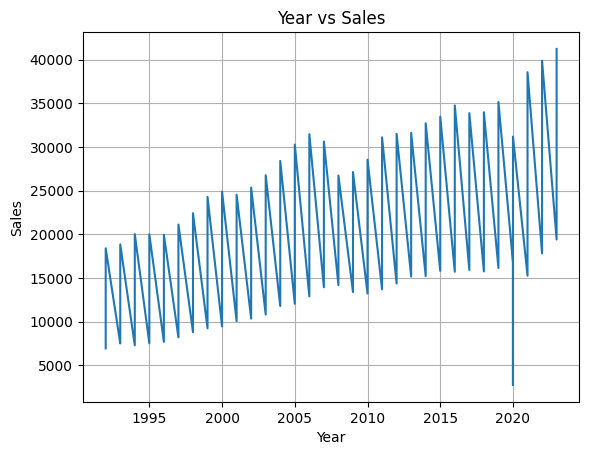

In [ ]:
# Your code to plot Year vs Sales. Use either matplot library of pandas dataframe.
import matplotlib.pyplot as plt

plt.plot(df.index.year.astype(int), df['Sales'])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Year vs Sales')
plt.grid(True)
plt.show()

### Next we will do Train Test Split.

We will use last 1.5 year (18 month) samples for testing. Rest is for training.

In [ ]:
# Assign variable test size = 18
# Store length of data in variable length.
# store training size in varialable train_size (Remember training size = total size - test_size)
test_size = 18  # Assigning test size (e.g., 18 rows)
length = len(df)  # Storing length of data in variable 'length'
train_size = length - test_size  # Calculating training size (total size - test_size)
test_index = length - test_size
print(f"Test Size: {test_size}")
print(f"Length of Data: {length}")
print(f"Training Size: {train_size}")

Test Size: 18
Length of Data: 384
Training Size: 366


Now, we will find the indexes of the test data. Remember, these are the last 18 indexes in the pandas dataframe.

In [ ]:
#Assign the start of test index in data frame to variable test_index.  Remember, it is equal to the length of dataframe - test size

Next, we will separate train and test datasets.

In [ ]:
# Store all data from 0 to test_index in variable train. Hint - Use df.iloc.
# Store everthing from test_index to the last sample in test variable. Hint - Use df.iloc.

train = df.iloc[:test_index]
test = df.iloc[test_index:]

print("Training Set:")
print(train.head())
print("\nTest Set:")
print(test.head())

Training Set:
             Sales
DATE              
1992-01-01  6938.0
1992-02-01  7524.0
1992-03-01  8475.0
1992-04-01  9401.0
1992-05-01  9558.0

Test Set:
              Sales
DATE               
2022-07-01  24904.0
2022-08-01  26049.0
2022-09-01  23629.0
2022-10-01  24787.0
2022-11-01  28645.0


In [ ]:
# Print the size of the train data
# Print the size of the test data
# Print the train data
# Print the test data
print(f"Size of Train Data: {len(train)}")
print(f"Size of Test Data: {len(test)}")

print("\nTrain Data:")
print(train.head())
print("\nTest Data:")
print(test.head())

Size of Train Data: 366
Size of Test Data: 18

Train Data:
             Sales
DATE              
1992-01-01  6938.0
1992-02-01  7524.0
1992-03-01  8475.0
1992-04-01  9401.0
1992-05-01  9558.0

Test Data:
              Sales
DATE               
2022-07-01  24904.0
2022-08-01  26049.0
2022-09-01  23629.0
2022-10-01  24787.0
2022-11-01  28645.0


### In Neural Networks, we need to Scale Data between 0-1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
#
# Check if the data has been scaled properly
#
print("\nTrain Data:")
print(scaled_train)
print("\nTest Data:")
print(scaled_test)


Train Data:
[[0.11688819]
 [0.13325142]
 [0.15980677]
 [0.18566402]
 [0.19004803]
 [0.17954875]
 [0.17734279]
 [0.21671507]
 [0.19046688]
 [0.20948285]
 [0.23553557]
 [0.43680889]
 [0.1326371 ]
 [0.13325142]
 [0.16793254]
 [0.19867642]
 [0.20414945]
 [0.19219815]
 [0.196638  ]
 [0.21992628]
 [0.20275327]
 [0.21205183]
 [0.2515358 ]
 [0.44954205]
 [0.12643807]
 [0.14380655]
 [0.2001843 ]
 [0.19873227]
 [0.20264157]
 [0.19940243]
 [0.19499051]
 [0.23469787]
 [0.20844968]
 [0.22277449]
 [0.26812242]
 [0.48207305]
 [0.13308388]
 [0.14545404]
 [0.19722439]
 [0.20708143]
 [0.21970289]
 [0.21079526]
 [0.19635876]
 [0.23768569]
 [0.22221602]
 [0.21464872]
 [0.27920809]
 [0.48168212]
 [0.1377192 ]
 [0.17421535]
 [0.2121356 ]
 [0.21830671]
 [0.24162292]
 [0.21785994]
 [0.20803083]
 [0.26197922]
 [0.21978666]
 [0.23729476]
 [0.28267061]
 [0.48006255]
 [0.15196024]
 [0.16985927]
 [0.22584609]
 [0.20604825]
 [0.24441528]
 [0.2206523 ]
 [0.22288618]
 [0.27111024]
 [0.22869429]
 [0.24804535]
 [0.292

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

# We will use 12 months as input and then predict the next month out


In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [ ]:
X, y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.11688819 0.13325142 0.15980677 0.18566402 0.19004803 0.17954875
 0.17734279 0.21671507 0.19046688 0.20948285 0.23553557 0.43680889]
Predict this y: 
 [[0.1326371]]


### Create the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU

import tensorflow as tf

In [ ]:
# We're only using one feature in our time series
n_features = 1

# Define your own models.

Use 1. SimpleRNN, LSTM, or GRU neural network.

APIs:
https://keras.io/api/layers/recurrent_layers/

In [ ]:
#
# Your code to create your own model
#
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100)               40800     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mse')

### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. Review video for more info on this.

In [ ]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)
# Your code to create an object early-stop.

Now, fit your model.

In [ ]:
model.fit(generator, epochs=20,
          validation_data=validation_generator,
          callbacks=[early_stop])

Epoch 1/20
354/354 [==============================] - 2s 3ms/step - loss: 0.0223 - val_loss: 0.0314
Epoch 2/20
354/354 [==============================] - 1s 2ms/step - loss: 0.0125 - val_loss: 0.0385
Epoch 3/20
354/354 [==============================] - 1s 2ms/step - loss: 0.0110 - val_loss: 0.0306
Epoch 4/20
354/354 [==============================] - 1s 2ms/step - loss: 0.0080 - val_loss: 0.0091
Epoch 5/20
354/354 [==============================] - 1s 2ms/step - loss: 0.0056 - val_loss: 0.0194
Epoch 6/20
354/354 [==============================] - 1s 2ms/step - loss: 0.0053 - val_loss: 0.0038
Epoch 7/20
354/354 [==============================] - 1s 2ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 8/20
354/354 [==============================] - 1s 2ms/step - loss: 0.0059 - val_loss: 0.0045


<Axes: >

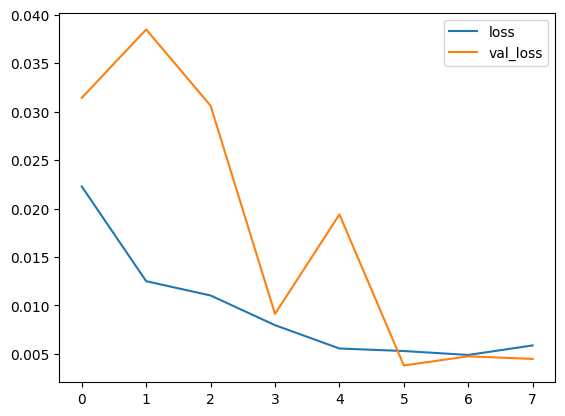

In [ ]:
# Get Losses from dataframe (hint - model.history.history)- See previous week tutorial.
# Plot losses in the dataframe.
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [ ]:
first_eval_batch = scaled_train[-length:]

In [ ]:
n_input = 12
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
model.predict(first_eval_batch)


1/1 [==============================] - 0s 143ms/step


array([[0.58660215]], dtype=float32)

In [ ]:
# compare with the true result:
scaled_test[0]

array([0.61856361])

#### Try predicting the series!

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 18ms/step


## Inverse Transformations and Compare

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

C:\Users\bs850\AppData\Local\Temp\ipykernel_13820\1339453577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


# Check and plot predictions

In [ ]:
# Print the test variable.
test

,Sales,Predictions
DATE,,
2022-07-01,24904.0,23759.396246
2022-08-01,26049.0,23535.267284
2022-09-01,23629.0,22177.805681
2022-10-01,24787.0,23054.608851
2022-11-01,28645.0,25841.204231
2022-12-01,39883.0,34599.480989
2023-01-01,19405.0,20167.955900
2023-02-01,20937.0,20851.233318
2023-03-01,24963.0,23527.984160


<Axes: xlabel='DATE'>

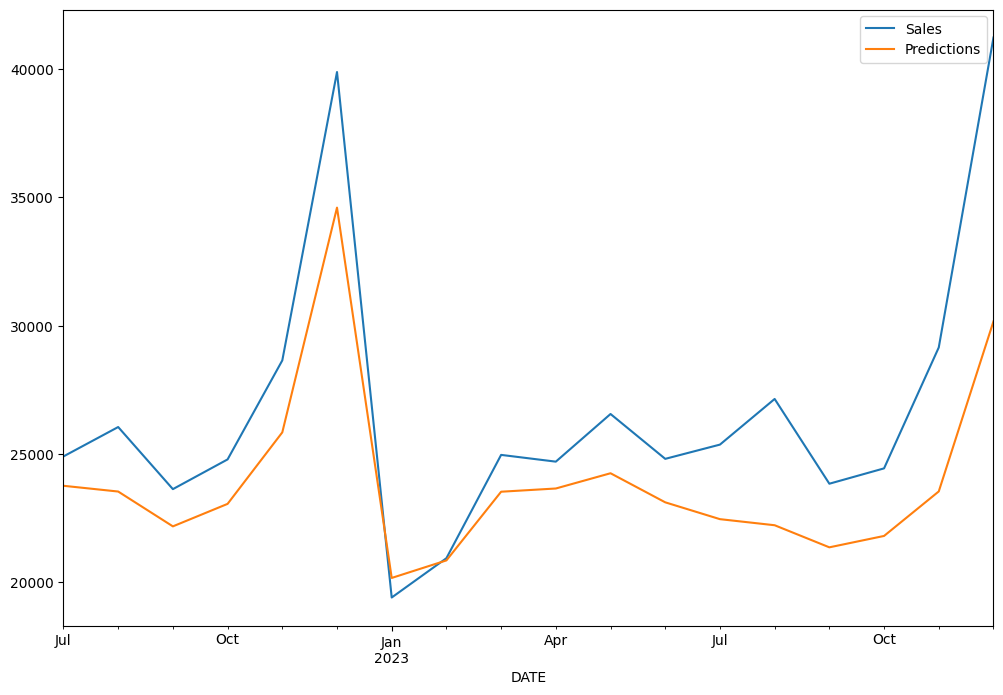

In [ ]:
# Your code to plot actual sales and predictions.
test.plot(figsize=(12, 8))

# Retrain and Forecasting

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data,
                                scaled_full_data, length=length, batch_size=1)

In [ ]:
#
# Use any neural network model based on RNN
#
# Create the model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# use early_stop
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
# fit the model
model.fit(generator, epochs=30,
          validation_data=validation_generator,
          callbacks=[early_stop])

Epoch 1/30
372/372 [==============================] - 2s 3ms/step - loss: 0.0203 - val_loss: 0.0311
Epoch 2/30
372/372 [==============================] - 1s 2ms/step - loss: 0.0129 - val_loss: 0.0567
Epoch 3/30
372/372 [==============================] - 1s 2ms/step - loss: 0.0117 - val_loss: 0.0219
Epoch 4/30
372/372 [==============================] - 1s 2ms/step - loss: 0.0090 - val_loss: 0.0065
Epoch 5/30
372/372 [==============================] - 1s 2ms/step - loss: 0.0073 - val_loss: 0.0067
Epoch 6/30
372/372 [==============================] - 1s 2ms/step - loss: 0.0044 - val_loss: 0.0161


In [ ]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):

    # get prediction 1 time  stamp ahead
    current_pred = model.predict(current_batch)[0]

    # store prediction
    forecast.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 [==============================] - 0s 16ms/step


In [ ]:
forecast = scaler.inverse_transform(forecast)

### Creating new timestamp index with pandas.

In [ ]:
df

,Sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0
...,...
2023-08-01,27143.0
2023-09-01,23840.0
2023-10-01,24438.0


In [ ]:
forecast_index = pd.date_range(start='2024-01-01',periods=periods,freq='MS')

In [ ]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [ ]:
forecast_df

,Forecast
2024-01-01,23111.475705
2024-02-01,23852.668047
2024-03-01,26582.178847
2024-04-01,26609.070053
2024-05-01,28194.178375
2024-06-01,27118.357225
2024-07-01,27647.399764
2024-08-01,29216.652563
2024-09-01,26785.739173
2024-10-01,27403.839889


<Axes: >

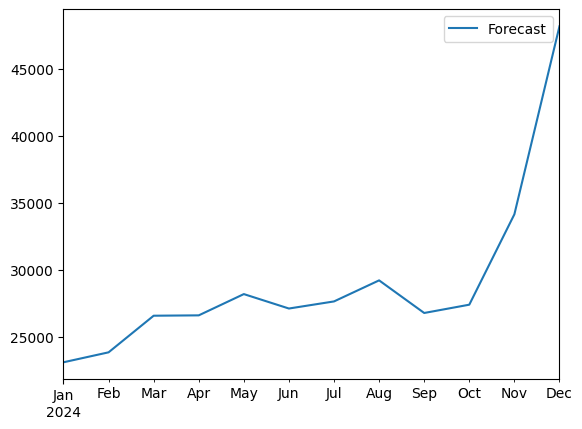

In [ ]:
# Plot sales - Values in dataframe
forecast_df.plot()

<Axes: xlabel='DATE'>

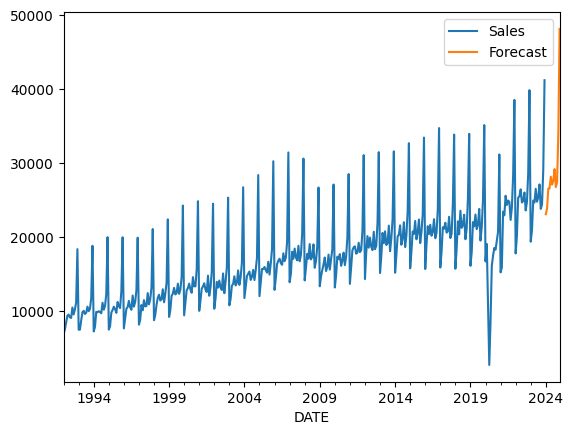

In [ ]:
# Plot forecast - Values in forecast_df
ax = df.plot()
forecast_df.plot(ax=ax)

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

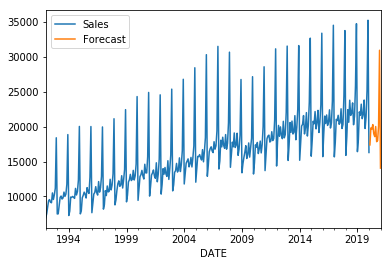

In [ ]:
ax = df.plot()
forecast_df.plot(ax=ax)

(624.0, 660.0)

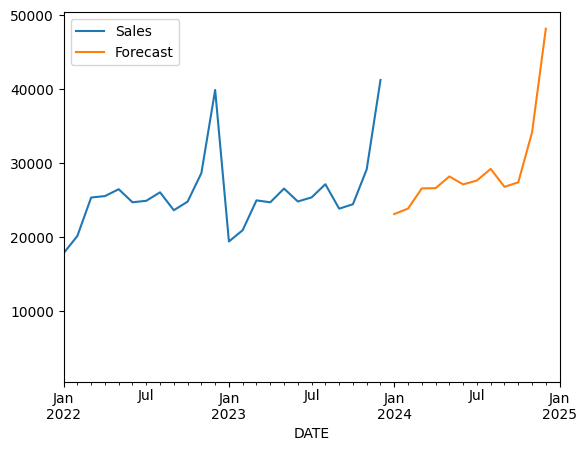

In [ ]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2022-01-01','2025-01-01')

# Try the same example with a LSTM and GRU!
Hint: Use LSTM instead of SimpleRNN!